<a href="https://colab.research.google.com/github/ChaiJuanYang/MDS17/blob/main/PTB_XL_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-processing

Upload File Path to Load

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1iIueOUd0DTVzrfGMEc1gXn4cD6r3UQ8a/view?usp=sharing


Downloading...
From (original): https://drive.google.com/uc?id=1iIueOUd0DTVzrfGMEc1gXn4cD6r3UQ8a
From (redirected): https://drive.google.com/uc?id=1iIueOUd0DTVzrfGMEc1gXn4cD6r3UQ8a&confirm=t&uuid=a480cb80-e3bd-4275-b267-0d709662f365
To: /content/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3.zip
100% 1.84G/1.84G [00:32<00:00, 55.8MB/s]


In [ ]:
!unzip -q ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3.zip

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/11D1nXKwVPUXtxMPWP3y17iMcV8WSG1bG/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=11D1nXKwVPUXtxMPWP3y17iMcV8WSG1bG
To: /content/updated_ptbxl_database.csv
100% 6.71M/6.71M [00:00<00:00, 18.3MB/s]


In [ ]:
import pandas as pd
path_dir = 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'
# Load the metadata from the CSV file
ptb_db = pd.read_csv(path_dir + 'ptbxl_database.csv')
len(ptb_db)

21799

In [ ]:
ptb_db_new = pd.read_csv(path_dir + 'updated_ptbxl_database.csv')

In [ ]:
!pip install heartpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.2 MB/s eta 0:00:00


In [ ]:
import heartpy as hp

In [ ]:
ptb_lr  = ptb_db['filename_lr']
len(ptb_lr)

21799

In [ ]:
!pip install wfdb
# !pip install ast

In [ ]:
import wfdb
# import ast

def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [ ]:
# Load raw signal data
# X = load_raw_data(Y=, sampling_rate, path)
ptb_db['bpm'] = 0
for i in range(0,10):#(len(ptb_lr)):
    ptb_lr  = ptb_db['filename_lr'][i]
    # print(ptb_lr)
    path = path_dir + ptb_lr + '.dat'
    # print(path)
    data = wfdb.rdsamp(path[:-4])[0]
    # print(data.shape)
    filtered = hp.remove_baseline_wander(data[:,0], sample_rate=100)
    wd, m = hp.process(hp.scale_data(filtered), sample_rate = 100)
    # print(wd)
    # print(m)
    # hp.plotter(wd,m)
    print(m['bpm'])
    ptb_db['bpm'][i]= m['bpm']
# path = path_dir + ptb_lr + '.dat'
# print(path)
# data = wfdb.rdsamp(path[:-4])[0]
# print(data.shape)


63.914780292942744
47.182175622542594
63.424947145877375
73.73271889400921
65.77344701583435
83.59133126934984
61.99770378874856
74.07407407407408
60.836501901140686
62.33766233766234


<ipython-input-53-daee5bbdf717>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptb_db['bpm'][i]= m['bpm']
<ipython-input-53-daee5bbdf717>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '63.914780292942744' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ptb_db['bpm'][i]= m['bpm']


In [ ]:
ptb_db

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,bpm
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,63.914780
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,47.182176
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,63.424947
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,73.732719
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,65.773447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21794,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,0.000000
21795,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,0.000000
21796,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,0.000000
21797,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,0.000000


In [ ]:
# prompt: save csv

ptb_db.to_csv('ptb_db_with_bpm.csv', index=False)


In [ ]:
ptb_db_new_lr= ptb_db_new['filename_lr']
len(ptb_db_new_lr)

21799

In [ ]:
# Load raw signal data
# X = load_raw_data(Y=, sampling_rate, path)
ptb_db_new['bpm'] = 0
for i in range(len(ptb_db_new_lr)):#(len(ptb_lr)):
    ptb_lr  = ptb_db_new['filename_lr'][i]
    # print(ptb_lr)
    path = path_dir + ptb_lr + '.dat'
    # print(path)
    data = wfdb.rdsamp(path[:-4])[0]
    # print(data.shape)
    filtered = hp.remove_baseline_wander(data[:,0], sample_rate=100)
    wd, m = hp.process(hp.scale_data(filtered), sample_rate = 100)
    # print(wd)
    # print(m)
    # hp.plotter(wd,m)
    print(m['bpm'])
    ptb_db_new['bpm'][i]= m['bpm']
# path = path_dir + ptb_lr + '.dat'
# print(path)
# data = wfdb.rdsamp(path[:-4])[0]
# print(data.shape)


63.914780292942744
47.182175622542594
63.424947145877375
73.73271889400921
65.77344701583435
83.59133126934984
61.99770378874856
74.07407407407408
60.836501901140686
62.33766233766234
67.13286713286713
47.24409448818898
78.43137254901961
73.84615384615384
60.301507537688444


<ipython-input-50-69335a40bb32>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptb_db_new['bpm'][i]= m['bpm']
<ipython-input-50-69335a40bb32>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '63.914780292942744' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ptb_db_new['bpm'][i]= m['bpm']
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:5334: Runti

nan
150.65502183406113
128.11387900355874
56.737588652482266
139.71539456662353
72.0
79.90314769975787
127.96208530805687
nan
101.91082802547771
88.09135399673735
62.35565819861432
88.3352208380521
97.48892171344164
63.6604774535809
67.95016987542469
99.17355371900827
75.18796992481202
132.4503311258278
74.25742574257426
91.1062906724512
58.18181818181818
72.77628032345014
88.45208845208845
64.13301662707839
72.60726072607261
58.906030855539974
79.42238267148014
60.78147612156295


/usr/local/lib/python3.10/dist-packages/heartpy/analysis.py:677: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  interp = UnivariateSpline(x, rrlist, k=3)


Streaming output truncated to the last 5000 lines.
nan
51.724137931034484
77.01283547257876
90.9090909090909
67.49156355455568
59.154929577464785
107.50279955207166
79.90314769975787
61.155152887882224
111.97511664074649
52.96343001261034
86.47450110864746
75.52447552447552
55.81395348837209
92.9032258064516
68.64988558352402
66.0377358490566
52.00433369447454
74.07407407407408
59.93340732519423
76.51434643995749
80.0
57.69230769230769
60.37735849056604
78.94736842105263
68.18181818181819
58.95196506550218
98.36065573770492
51.282051282051285
75.75757575757575
70.06369426751593
72.55139056831922
158.94039735099338
70.6713780918728
65.64551422319475
63.67924528301887
nan
124.08759124087592
201.9230769230769
119.68085106382979
68.08510638297872
70.70707070707071
70.27818448023426
nan
82.66360505166475
173.91304347826087
70.58823529411765
67.95016987542469
85.90308370044053
61.224489795918366
112.78195488721805
nan
117.31843575418993
80.64516129032258
50.359712230215834
61.583577712609966

In [ ]:
print(ptb_db_new)

       ecg_id  patient_id    age  sex  height  weight  nurse  site  \
0           1     15709.0   56.0    1     NaN    63.0    2.0   0.0   
1           2     13243.0   19.0    0     NaN    70.0    2.0   0.0   
2           3     20372.0   37.0    1     NaN    69.0    2.0   0.0   
3           4     17014.0   24.0    0     NaN    82.0    2.0   0.0   
4           5     17448.0   19.0    1     NaN    70.0    2.0   0.0   
...       ...         ...    ...  ...     ...     ...    ...   ...   
21794   21833     17180.0   67.0    1     NaN     NaN    1.0   2.0   
21795   21834     20703.0  300.0    0     NaN     NaN    1.0   2.0   
21796   21835     19311.0   59.0    1     NaN     NaN    1.0   2.0   
21797   21836      8873.0   64.0    1     NaN     NaN    1.0   2.0   
21798   21837     11744.0   68.0    0     NaN     NaN    1.0   2.0   

           device       recording_date  ... static_noise burst_noise  \
0       CS-12   E  1984-11-09 09:17:34  ...    , I-V1,           NaN   
1       CS-12  

In [ ]:
# prompt: save as csv

ptb_db_new.to_csv('ptb_db_new_with_bpm.csv', index=False)


### PTB_DB Analyzing

Count Number of Unique Patients

In [ ]:
# Count the number of unique patients
num_patients = ptb_db['patient_id'].nunique()
print(f"Number of patients: {num_patients}")

Number of patients: 18869


Describing Age Column

In [ ]:
# Check for missing or invalid values in the age column
print(ptb_db['age'].describe())


count    21799.000000
mean        62.769301
std         32.308813
min          2.000000
25%         50.000000
50%         62.000000
75%         72.000000
max        300.000000
Name: age, dtype: float64


In [ ]:
print(ptb_db['age'].max())

300.0


The date of birth only as age at the time of the ECG recording, where ages of more than 89 years appear in the range of 300 years in compliance with HIPAA standards.:

age_group
0-9        14
10-19     467
20-29     898
30-39    1468
40-49    2462
50-59    4441
60-69    5248
70-79    4093
80-89    2415
90-95     293
Name: count, dtype: int64


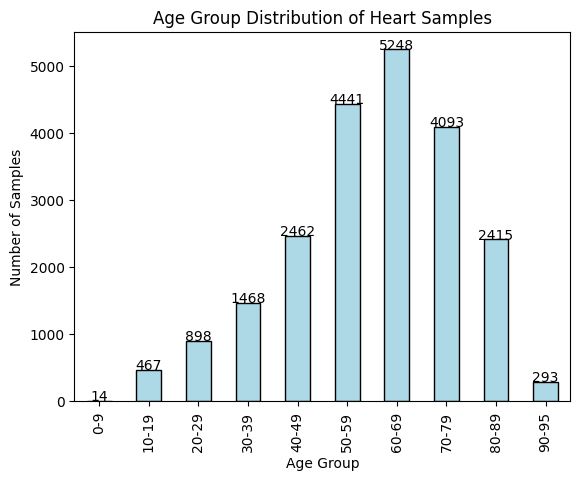

In [ ]:
import matplotlib.pyplot as plt
# Replace age 300 with 90 to group them in the '90-95' age group
ptb_db['age'] = ptb_db['age'].replace(300, 90)

# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-95']

# Create a new column for age groups
ptb_db['age_group'] = pd.cut(ptb_db['age'], bins=bins, labels=labels, right=False)

# Count the number of samples in each age group
age_group_distribution = ptb_db['age_group'].value_counts().sort_index()

# Print the distribution
print(age_group_distribution)
ax = age_group_distribution.plot(kind='bar', color='lightblue', edgecolor='black')
# Plot the age group distribution
plt.title('Age Group Distribution of Heart Samples')
plt.xlabel('Age Group')
plt.ylabel('Number of Samples')
# Remove grid lines
plt.grid(False)

# Add labels to each bar
for idx, value in enumerate(age_group_distribution):
    ax.text(idx, value + 5, str(value), ha='center')

plt.show()


In [ ]:
import numpy as np

# Read the .hea file
filename = path_dir + 'records100/00000/00001_lr.hea'
dat_file = path_dir + 'records100/00000/00001_lr.dat'
with open(filename, 'r') as file:
    hea_contents = file.readlines()

data = np.fromfile(dat_file, dtype=np.int16)  # Adjust dtype based on the data format

# Display the first few samples
print(data[:10])
# Display the contents of the .hea file
for line in hea_contents:
    print(line.strip())

# # Example of parsing metadata
# header_info = {}
# for line in hea_contents:
#     if line.startswith('#'):
#         continue  # Skip comment lines
#     parts = line.split()
#     if len(parts) > 1:
#         header_info[parts[0]] = ' '.join(parts[1:])

# # Print parsed header info
# print(header_info)


[-119  -55   64   86  -91    4  -69  -31    0  -26]
00001_lr 12 100 1000
00001_lr.dat 16 1000.0(0)/mV 16 0 -119 1508 0 I
00001_lr.dat 16 1000.0(0)/mV 16 0 -55 723 0 II
00001_lr.dat 16 1000.0(0)/mV 16 0 64 64758 0 III
00001_lr.dat 16 1000.0(0)/mV 16 0 86 64423 0 AVR
00001_lr.dat 16 1000.0(0)/mV 16 0 -91 1211 0 AVL
00001_lr.dat 16 1000.0(0)/mV 16 0 4 7 0 AVF
00001_lr.dat 16 1000.0(0)/mV 16 0 -69 63827 0 V1
00001_lr.dat 16 1000.0(0)/mV 16 0 -31 6999 0 V2
00001_lr.dat 16 1000.0(0)/mV 16 0 0 63759 0 V3
00001_lr.dat 16 1000.0(0)/mV 16 0 -26 61447 0 V4
00001_lr.dat 16 1000.0(0)/mV 16 0 -39 64979 0 V5
00001_lr.dat 16 1000.0(0)/mV 16 0 -79 832 0 V6


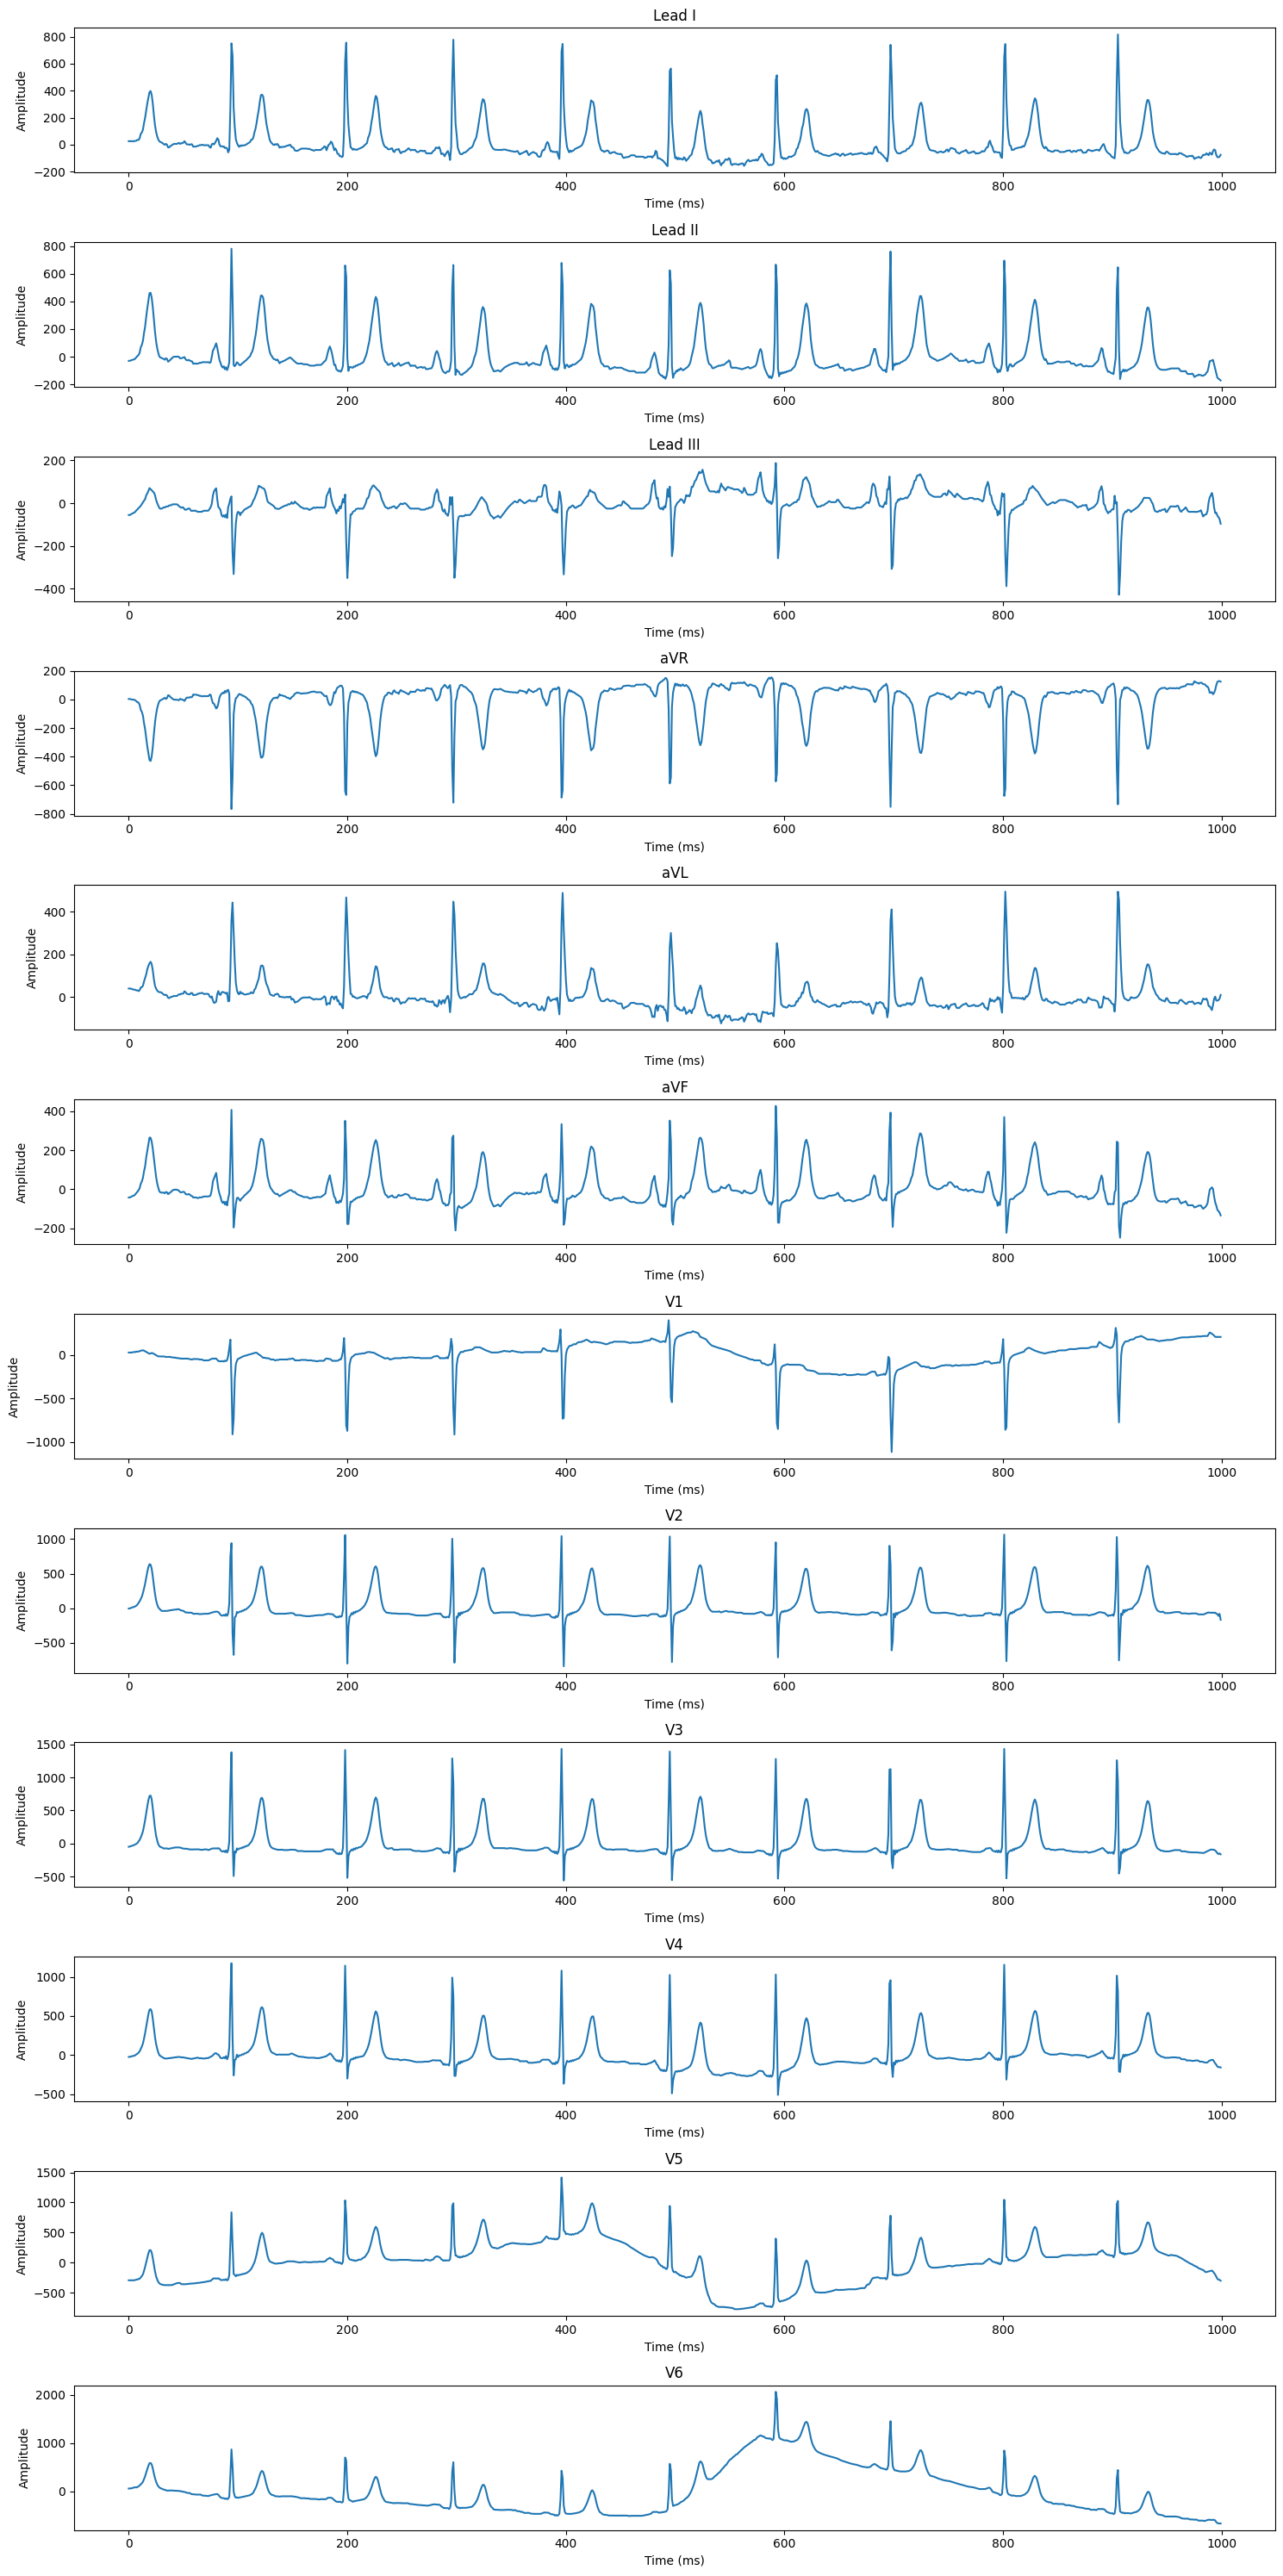

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_and_visualize_ecg_data_cyclic(dat_file, num_leads=12, samples_per_lead=1000):
    # Step 1: Load the .dat file as raw data
    data = np.fromfile(dat_file, dtype=np.int16)

    # Step 2: Check if the total length matches the expected size
    if len(data) != num_leads * samples_per_lead:
        raise ValueError(f"Expected {num_leads * samples_per_lead} data points, but got {len(data)}.")

    # Step 3: Assign the values cyclically to each lead
    leads_data = np.zeros((num_leads, samples_per_lead))
    for i in range(len(data)):
        leads_data[i % num_leads, i // num_leads] = data[i]

    # Step 4: Plot each lead's data in one row per diagram
    lead_names = ['Lead I', 'Lead II', 'Lead III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

    plt.figure(figsize=(15, 30))  # Increase figure size to accommodate more rows

    for i in range(num_leads):
        plt.subplot(num_leads, 1, i + 1)  # One row per diagram
        plt.plot(leads_data[i])
        plt.title(f"{lead_names[i]}")
        plt.xlabel('Time (ms)')
        plt.ylabel('Amplitude')
        plt.tight_layout()

    plt.show()

# Example usage:
dat_file = path_dir + 'records100/10000/10740_lr.dat'
load_and_visualize_ecg_data_cyclic(dat_file)
# 7 is clean

In [ ]:
# Count rows with empty or missing height
empty_height_count = ptb_db['height'].isna().sum() + (ptb_db['height'] == '').sum()

print(f"Number of rows with empty height: {empty_height_count}")

empty_proportion = 14825/ 18869 * 100
print('Empty Height entries proportion '+str(empty_proportion) + ' %')

Number of rows with empty height: 14825
Empty Height entries proportion 78.5680216227675 %


In [ ]:
# Count rows with empty or missing weight
empty_weight_count = ptb_db['weight'].isna().sum() + (ptb_db['weight'] == '').sum()

print(f"Number of rows with empty weight: {empty_weight_count}")

empty_w_proportion = 12378/ 18869 * 100
print('Empty weight entries proportion '+str(empty_w_proportion) + ' %')

Number of rows with empty weight: 12378
Empty weight entries proportion 65.5996608193333 %


Add Baseline Noise Filters
- SciPy

Add Static Noise Filters
- SciPy as well


remove entries with electrode_problems and burst noise


In [ ]:
ptb_db_update = pd.read_csv('updated_ptbxl_database.csv')
len(ptb_db_update)

FileNotFoundError: [Errno 2] No such file or directory: 'updated_ptbxl_database.csv'

In [ ]:
# Filter entries where 'electrodes_problem' column has values
entries_with_electrodes_problem = ptb_db_update[ptb_db_update['electrodes_problems'].notna()]
len(entries_with_electrodes_problem)


In [ ]:
# Remove rows where 'electrodes_problem' column has values
ptb_db_updated = ptb_db_update[ptb_db_update['electrodes_problems'].isna()]
len(ptb_db_updated)

In [ ]:
entries_with_burst= ptb_db_update[ptb_db_update['burst_noise'].notna()]
len(entries_with_burst)
# entries_with_burst

In [ ]:
# Remove rows where 'burst_noise' has values
ptb_db_updated_b= ptb_db_update[ptb_db_update['burst_noise'].isna()]
len(ptb_db_updated_b)

In [ ]:
# remove burst noise and electrode problem entries
# Remove rows where 'burst_noise' or 'electrodes_problem' columns have values
ptb_db_updated = ptb_db_update[(ptb_db_update['burst_noise'].isna()) & (ptb_db_update['electrodes_problems'].isna())]

# Get the number of remaining rows
num_rows = len(ptb_db_updated)
num_rows

In [ ]:
# Filter rows where 'class' column has 'NORM' or 'MI'
ptb_db_updated = ptb_db_update[ptb_db_update['class'].isin(['NORM', 'MI'])]
len(ptb_db_updated)

In [ ]:
# count for norm entries
# Find entries where 'class' column has 'NORM'
norm_entries = ptb_db_update[ptb_db_update['class'] == 'NORM']
len(norm_entries)

In [ ]:
# count for norm entries
# Find entries where 'class' column has 'MI'
mi_entries = ptb_db_update[ptb_db_update['class'] == 'MI']
len(mi_entries)

Load the new ptb with bpm


In [ ]:
ptb_bpm = pd.read_csv('ptb_db_new_with_bpm.csv')
len(ptb_bpm)

21799

In [ ]:
ptb_bpm_burst = ptb_bpm[ptb_bpm['burst_noise'].notna()]
len(ptb_bpm_burst)

613

In [ ]:
ptb_bpm_electrode = ptb_bpm[ptb_bpm['electrodes_problems'].notna()]
len(ptb_bpm_electrode)

30

In [ ]:
# remove burst noise and electrode problem entries
# Remove rows where 'burst_noise' or 'electrodes_problem' columns have values
ptb_db_updated = ptb_bpm[(ptb_bpm['burst_noise'].isna()) & (ptb_bpm['electrodes_problems'].isna())]

# Get the number of remaining rows
num_rows = len(ptb_db_updated)
num_rows

21156

In [ ]:
ptb_db_updated= ptb_db_updated[ptb_db_updated['bpm'].notna()]
len(ptb_db_updated)

20759

414 rows with empty bpm before removing noise
397 rows with empty bpm after removing noise

In [ ]:
ptb_db_updated= ptb_db_updated[ptb_db_updated['class'].isin(['NORM', 'MI'])]
len(ptb_db_updated)

12648

In [ ]:
ptb_db_update_norm= ptb_db_updated[ptb_db_updated['class'].isin(['NORM'])]
len(ptb_db_update_norm)

8747

In [ ]:
ptb_db_update_mi= ptb_db_updated[ptb_db_updated['class'].isin(['MI'])]
len(ptb_db_update_mi)

3901

In [ ]:
# count for norm entries
# Find entries where 'class' column has 'NORM'
norm_entries = ptb_bpm[ptb_bpm['class'] == 'NORM']
norm_entries['bpm'].describe()

,bpm
count,8960.000000
mean,82.653618
std,64.904592
min,34.188034
25%,63.021533
50%,71.240106
75%,82.603254
max,2000.000000


In [ ]:
# count for MI entries
# Find entries where 'class' column has 'MI'
mi_entries = ptb_bpm[ptb_bpm['class'] == 'MI']
mi_entries['bpm'].describe()

,bpm
count,4050.000000
mean,88.085204
std,61.112315
min,33.149171
25%,64.981949
50%,75.746951
75%,91.993186
max,1500.000000


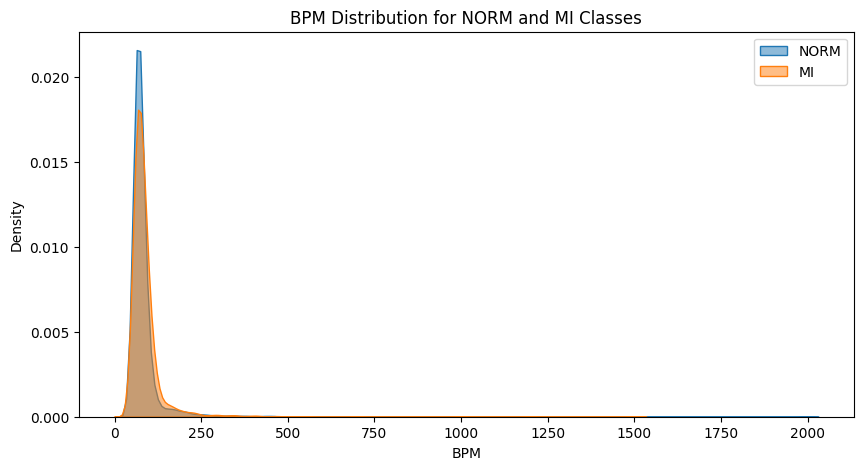

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clean the 'bpm' column by keeping only finite numeric values
ptb_bpm_clean = ptb_bpm[np.isfinite(ptb_bpm['bpm'])]

# Plotting the distribution
plt.figure(figsize=(10, 5))

# Plot BPM distribution for 'NORM' class
sns.kdeplot(data=ptb_bpm_clean[ptb_bpm_clean['class'] == 'NORM']['bpm'], label='NORM', fill=True, alpha=0.5)

# Plot BPM distribution for 'MI' class
sns.kdeplot(data=ptb_bpm_clean[ptb_bpm_clean['class'] == 'MI']['bpm'], label='MI', fill=True, alpha=0.5)

# Add labels and title
plt.xlabel('BPM')
plt.ylabel('Density')
plt.title('BPM Distribution for NORM and MI Classes')
plt.legend()
plt.grid(False)

# Show the plot
plt.show()


In [ ]:
norm_mean = ptb_bpm_clean[ptb_bpm_clean['class'] == 'NORM']['bpm'].mean()
mi_mean = ptb_bpm_clean[ptb_bpm_clean['class'] == 'MI']['bpm'].mean()

norm_std = ptb_bpm_clean[ptb_bpm_clean['class'] == 'NORM']['bpm'].std()
mi_std = ptb_bpm_clean[ptb_bpm_clean['class'] == 'MI']['bpm'].std()

# print(f"NORM - Mean: {norm_mean}, Std Dev: {norm_std}")
# print(f"MI - Mean: {mi_mean}, Std Dev: {mi_std}")

norm_max = ptb_bpm_clean[ptb_bpm_clean['class'] == 'NORM']['bpm'].max()
mi_max = ptb_bpm_clean[ptb_bpm_clean['class'] == 'MI']['bpm'].max()

norm_min = ptb_bpm_clean[ptb_bpm_clean['class'] == 'NORM']['bpm'].min()
mi_min = ptb_bpm_clean[ptb_bpm_clean['class'] == 'MI']['bpm'].min()

print(f"NORM - Mean: {norm_mean}, Std Dev: {norm_std}, Max: {norm_max}, Min: {norm_min}")
print(f"MI - Mean: {mi_mean}, Std Dev: {mi_std}, Max: {mi_max}, Min: {mi_min}")

NORM - Mean: 82.65361796983105, Std Dev: 64.90459217155671, Max: 2000.0, Min: 34.18803418803419
MI - Mean: 88.08520430925056, Std Dev: 61.11231478917918, Max: 1500.0, Min: 33.149171270718234


In [ ]:
# Get the mode (peak value) for the 'NORM' class
norm_peak = ptb_bpm_clean[ptb_bpm_clean['class'] == 'NORM']['bpm'].mode().values[0]

# Get the mode (peak value) for the 'MI' class
mi_peak = ptb_bpm_clean[ptb_bpm_clean['class'] == 'MI']['bpm'].mode().values[0]

print(f"Peak value for NORM class: {norm_peak}")
print(f"Peak value for MI class: {mi_peak}")


Peak value for NORM class: 63.82978723404256
Peak value for MI class: 84.50704225352112


In [ ]:
import numpy as np
from scipy.stats import gaussian_kde, entropy

# Extract BPM values for 'NORM' and 'MI' classes
norm_bpm = ptb_bpm_clean[ptb_bpm_clean['class'] == 'NORM']['bpm']
mi_bpm = ptb_bpm_clean[ptb_bpm_clean['class'] == 'MI']['bpm']

# Perform kernel density estimation for both distributions
norm_kde = gaussian_kde(norm_bpm, bw_method=0.5)  # Adjust bandwidth as needed
mi_kde = gaussian_kde(mi_bpm, bw_method=0.5)

# Define a range of BPM values to evaluate the distributions
bpm_range = np.linspace(min(ptb_bpm_clean['bpm']), max(ptb_bpm_clean['bpm']), 1000)

# Evaluate the probability densities
norm_pdf = norm_kde(bpm_range)
mi_pdf = mi_kde(bpm_range)

# Normalize the densities to ensure they sum to 1
norm_pdf /= np.sum(norm_pdf)
mi_pdf /= np.sum(mi_pdf)

# Calculate KL divergence (norm || mi) and (mi || norm)
kl_divergence_norm_mi = entropy(norm_pdf, mi_pdf)
kl_divergence_mi_norm = entropy(mi_pdf, norm_pdf)

print(f"KL Divergence (NORM || MI): {kl_divergence_norm_mi}")
print(f"KL Divergence (MI || NORM): {kl_divergence_mi_norm}")


KL Divergence (NORM || MI): 0.030243960074145107
KL Divergence (MI || NORM): 0.008904549884598628


KL(NORM || MI): How much information is lost when 'NORM' is approximated by 'MI'.
KL(MI || NORM): How much information is lost when 'MI' is approximated by 'NORM'.
Interpreting KL Divergence:
Zero Value: If the KL divergence is close to 0, it indicates that the two distributions are very similar.
Positive Value: The larger the KL divergence, the more different the distributions are.
Asymmetry: Note that KL divergence is not symmetric, i.e., KL(NORM || MI) is not necessarily equal to KL(MI || NORM).

Calculate All Classes Distribution


In [ ]:
ptb_class = pd.read_csv('ptb_db_new_with_bpm.csv')
len(ptb_class)

21799

In [ ]:
ptb_class= ptb_class[ptb_class['bpm'].notna()]
len(ptb_class)

21385

In [ ]:
norm_entries = ptb_class[ptb_class['class'] == 'HYP']
norm_entries['age'].min()

4.0